# KNN Classifier Machine Learning

# Import Libaries and Load Dataset

In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

In [10]:
fruits = pd.read_table('../course3/assets/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [13]:
lookup_fruits = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruits

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

# Splitting Data

In [15]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Create Classifier Object

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Evaluate score / accuracy

In [28]:
knn.score(X_test, y_test)

0.5333333333333333

# Prediction a new data

In [30]:
fruit_predict = knn.predict([[ 100, 7, 4.5]])

fruit_predict

array([4])

In [32]:
lookup_fruits[fruit_predict[0]]

'lemon'

# Plot Decision Boundary  

<h3>k = 5</h3>

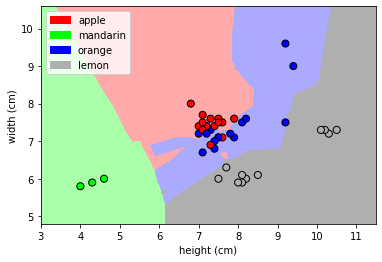

In [33]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')

<h3>k =1 </h3>

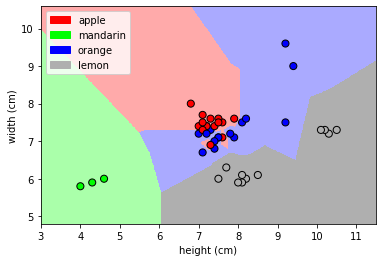

In [34]:
plot_fruit_knn(X_train, y_train, 1, 'uniform')

<h3>k =10 </h3>

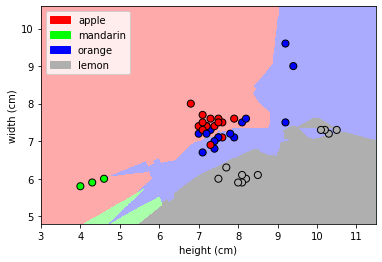

In [35]:
plot_fruit_knn(X_train, y_train, 10, 'uniform')

# Accuracy and Sensitivity varies with **K value**

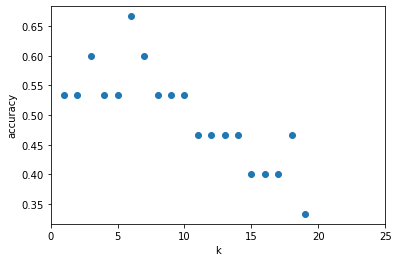

In [38]:
k_range = range(1,20)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    scores.append(knn.score(X_test, y_test))
    

    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)

plt.xticks([0, 5, 10, 15, 20, 25]);


**note :** choose k with higher accuracy